In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [125]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

In [126]:
import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)


    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel("parameter")
    ax.set_ylabel("likelihood")

    plt.show()




## 1. Likelihood methods and identifiability 


### 1.1 $\mathcal{L}(\hat{\theta})$ plots


When we do parameter estimation using either (a) Nested sampling (c.f. Bilby) or (b) expectation maximisation we want to try to maximise the likelihood.

When we run the Kalman filter for a particular set of parameters it returns a likelihood $\mathcal{L}(\hat{\theta}) = \text{KF}(\hat{\theta})$ 

For each of our parameters, what does the $\mathcal{L}(\hat{\theta})$ curve look like (holding other parameters constant)?

In [134]:
from plotting import likelihoods_over_priors,iterate_over_priors
import numpy as np 

#Set everything up
P   = SystemParameters(h=1e-10,σp=0.0,σm=0.0,Npsr=20)   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

true_parameters = priors_dict(PTA,P)
#true_parameters["simga_m"] =1e-1# priors_dict(PTA,P)

model_likelihood_large_h,res_x,res_y= KF.likelihood(true_parameters)
print("Optimal likelihood is: ", model_likelihood_large_h)

float64
float64
float64
float64
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]
[0.00000000e+00 0.00000000e+00 1.23259502e-33 1.23259502e-33
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.23259502e-33 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[nan nan  0.  0. nan nan nan nan nan nan nan nan  0. nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan

/Users/t1/github_repos/StateSpacePTA/notebooks/../py_src/kalman_filter.py:62: RuntimeWarning: invalid value encountered in divide
  #Update the covariance
/Users/t1/github_repos/StateSpacePTA/notebooks/../py_src/kalman_filter.py:18: RuntimeWarning: invalid value encountered in divide
  x = innovation / S
/Users/t1/github_repos/StateSpacePTA/notebooks/../py_src/kalman_filter.py:22: RuntimeWarning: divide by zero encountered in log
  return value


### Omega


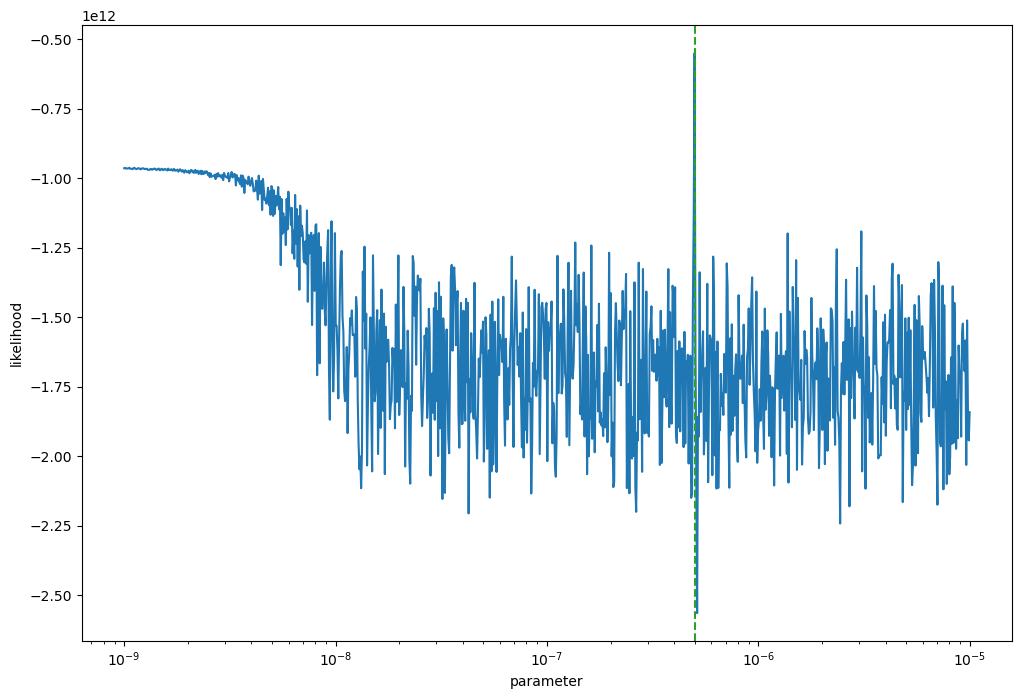

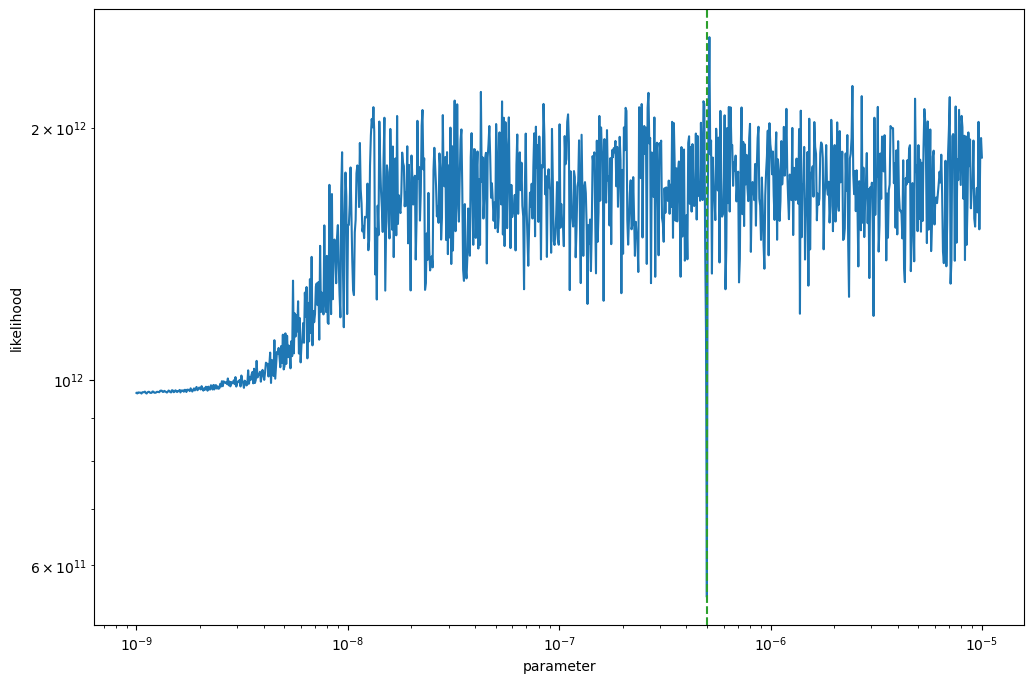

In [129]:
import numpy as np 
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods_large_h_omega = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods_large_h_omega,True,False,true_parameters[variable])
plot_likelihood(variable_range,np.abs(likelihoods_large_h_omega),True,True,true_parameters[variable])

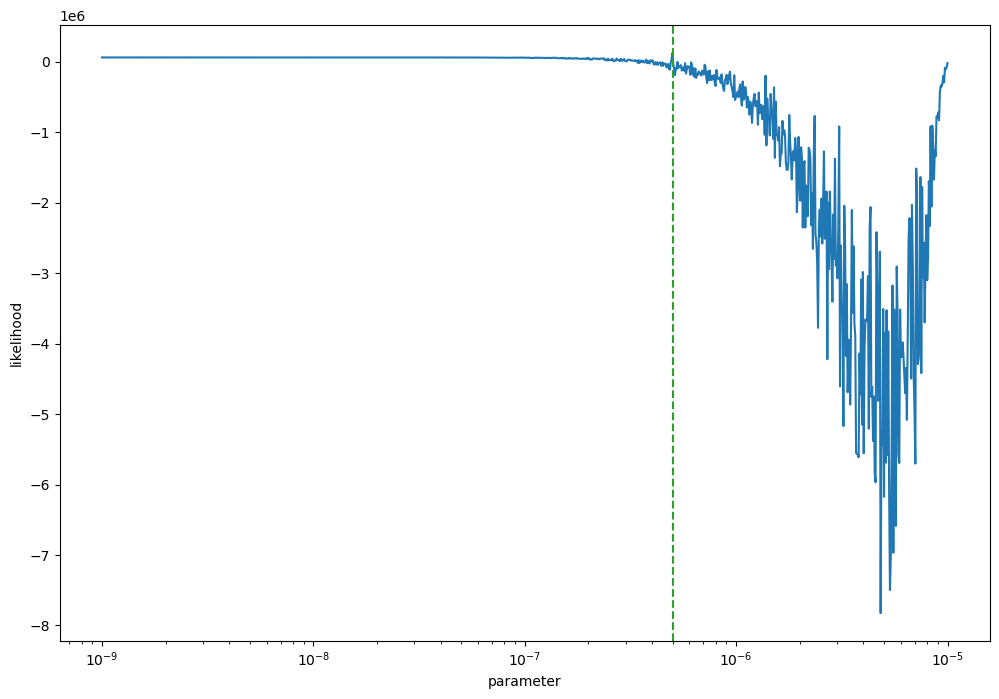

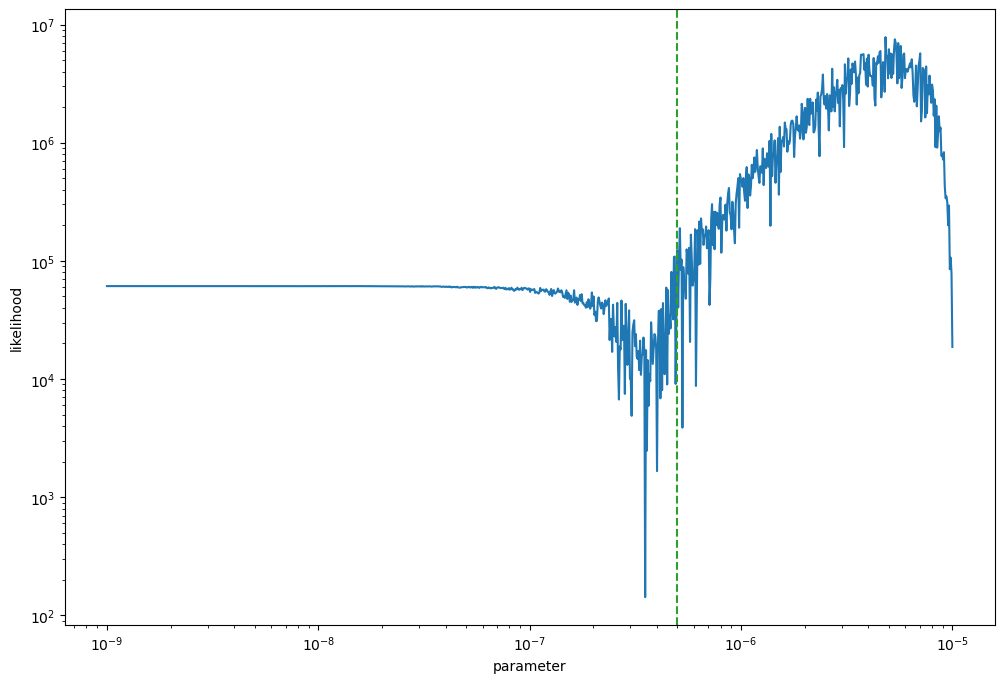

In [131]:
import numpy as np 
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods_large_h_omega = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods_large_h_omega,True,False,true_parameters[variable])
plot_likelihood(variable_range,np.abs(likelihoods_large_h_omega),True,True,true_parameters[variable])

### Small h

In [12]:
from plotting import likelihoods_over_priors,iterate_over_priors
import numpy as np 

#Set everything up
P   = SystemParameters(h=1e-10)   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

true_parameters = priors_dict(PTA,P)
#true_parameters["simga_m"] =1e-1# priors_dict(PTA,P)

model_likelihood= KF.likelihood(true_parameters)
print("Optimal likelihood is: ", model_likelihood)

Optimal likelihood is:  -3.5038859223346754e+20


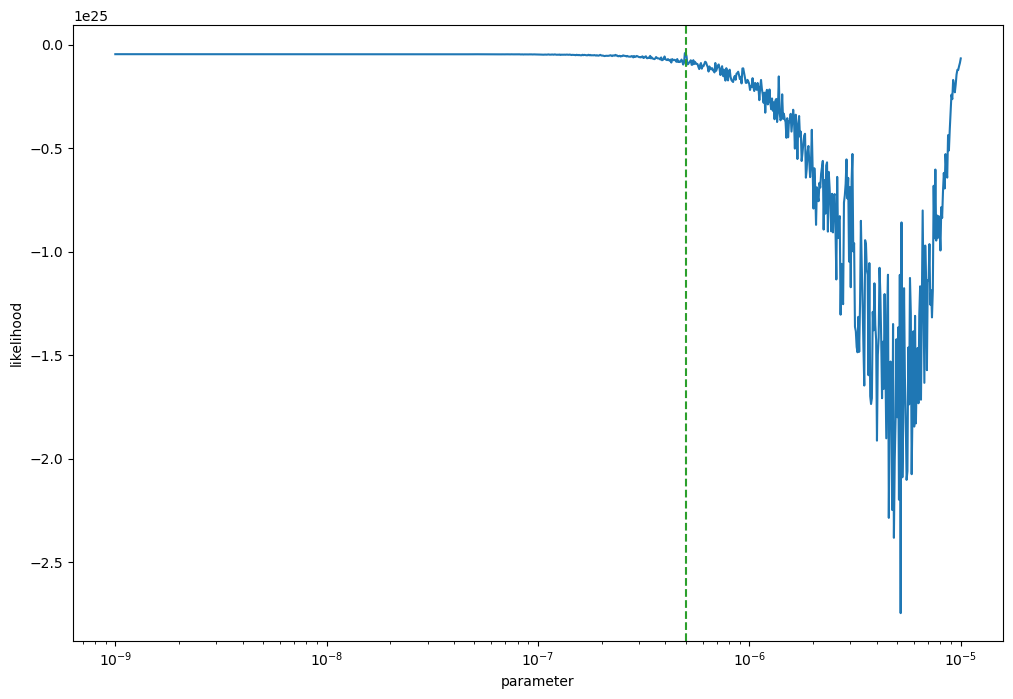

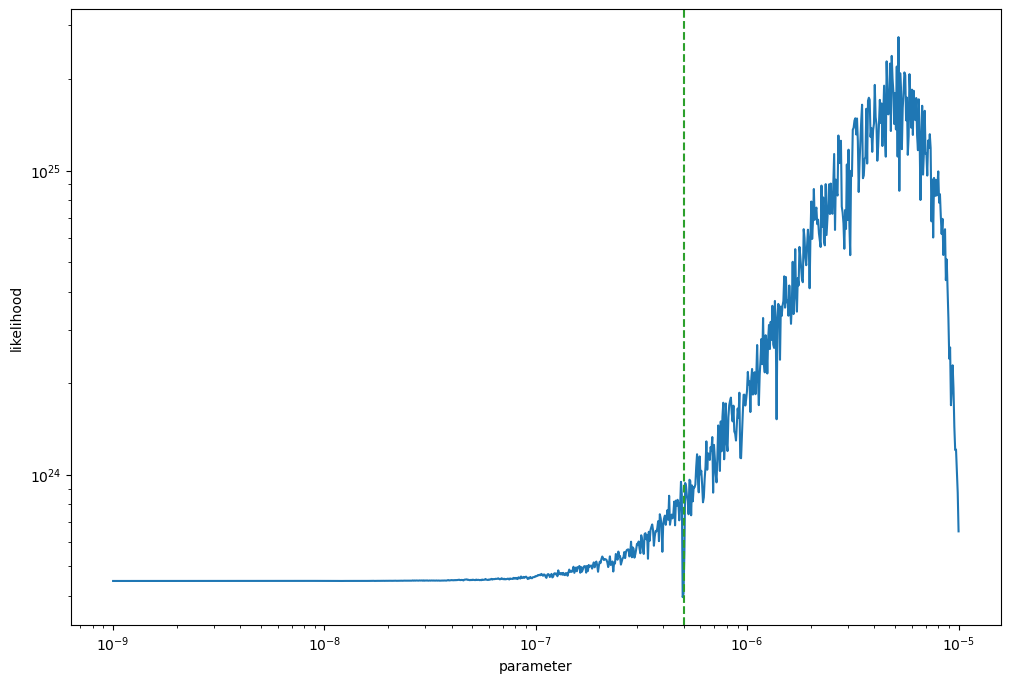

In [13]:
import numpy as np 
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods_small_h_omega = iterate_over_priors(variable, variable_range,selected_parameters,KF)





plot_likelihood(variable_range,likelihoods_small_h_omega,True,False,true_parameters[variable])
plot_likelihood(variable_range,np.abs(likelihoods_small_h_omega),True,True,true_parameters[variable])




In [14]:
ratio = likelihoods_large_h_omega / likelihoods_small_h_omega

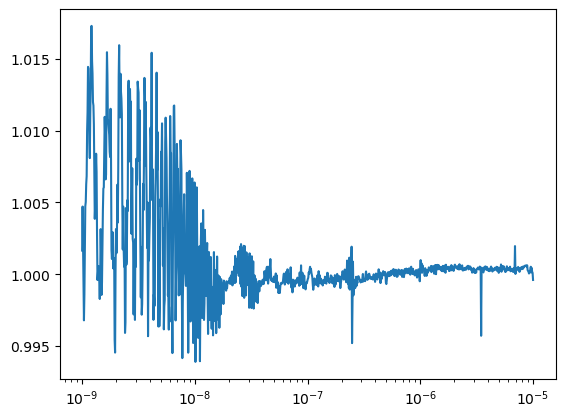

In [15]:
import matplotlib.pyplot as plt 
plt.plot(variable_range,ratio)
plt.xscale('log')